In [888]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

Parameters

In [1027]:
u = 10
dx = 8
dz = 0.1
N2 = 1     #constant. N^2 = g * d ln(θ)/dz, where θ is the potential temperature. Relates change in temperature with change in height. Does technically vary with
            #height but is assumed to be constant. Square of the buoancy frequency.
xlen = 1000 #meters
zlen = 250 # meters

#Setting up the ground
def ground(x):
    ans = 10 * np.sin((np.pi * x) / 250) + 10
    return ans
# Setting up the slope of the ground
def slope(y):
    der = np.pi  * np.cos((np.pi * y) / 250) / 25
    return der
nx = int(xlen / dx) + 1
nz = int(zlen / dz) 

xpos = np.arange(0, xlen + 1, dx)
zpos = np.arange(0, zlen + dz, dz)

Setting up vectors

In [1030]:
initial_w = u * slope(xpos)
solution = np.zeros([nx, nz])
solution[:,0] = initial_w
print(solution)
print(initial_w)

[[1.25663706 0.         0.         ... 0.         0.         0.        ]
 [1.25029232 0.         0.         ... 0.         0.         0.        ]
 [1.23132217 0.         0.         ... 0.         0.         0.        ]
 ...
 [1.23132217 0.         0.         ... 0.         0.         0.        ]
 [1.25029232 0.         0.         ... 0.         0.         0.        ]
 [1.25663706 0.         0.         ... 0.         0.         0.        ]]
[ 1.25663706  1.25029232  1.23132217  1.19991818  1.15639744  1.10119945
  1.03488158  0.95811352  0.87167045  0.77642529  0.67333981  0.56345497
  0.44788038  0.3277831   0.20437589  0.07890489 -0.04736288 -0.17315239
 -0.2971934  -0.41823337 -0.53505004 -0.64646378 -0.75134956 -0.84864824
 -0.93737729 -1.01664074 -1.08563818 -1.14367289 -1.19015883 -1.22462659
 -1.2467281  -1.2562402  -1.25306683 -1.23724003 -1.20891963 -1.16839159
 -1.11606518 -1.05246878 -0.97824458 -0.8941421  -0.80101061 -0.69979054
 -0.59150401 -0.47724449 -0.35816577 -0.23547

In [1032]:
from scipy.sparse import spdiags

Making Matrices

In [1035]:
c1 = (-dz ** 2) / (dx ** 2)
c2 = 2 + 2 * ((dz ** 2) / (dx ** 2)) - (N2 / u) * dz ** 2
mat = np.array([c1 * np.ones(nx), c2 * np.ones(nx), c1 * np.ones(nx)])
diags = np.array([-1,0,1])
M = spdiags(mat, diags, nx, nx).toarray()

Boundary Conditions

In [1038]:
M[0,0] = 1
M[0,1] = 0 

M[-1,-1] = 1 
M[-1,-2] = 0 

Looping

In [1041]:
for k in np.arange(nz-2):
    solution[:,k+2] = np.matmul(M,solution[:,k+1]) - solution[:,k]

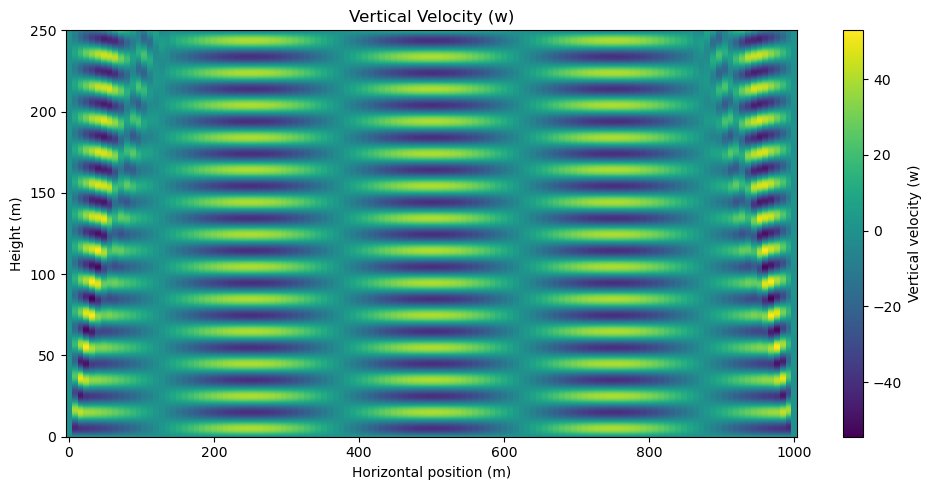

In [1043]:
z_domain = np.linspace(0,zlen,nz)
x_domain = np.linspace(0,xlen,nx)
plt.figure(figsize=(10, 5))
plt.pcolormesh(x_domain, z_domain, solution.T, cmap='viridis')
plt.colorbar(label="Vertical velocity (w)")
plt.xlabel("Horizontal position (m)")
plt.ylabel("Height (m)")
plt.title("Vertical Velocity (w)")
plt.tight_layout()
plt.show()

In [1044]:
print(solution)

[[ 1.25663706  0.         -1.25663706 ...  0.         -1.25663706
  -1.25663706]
 [ 1.25029232  0.         -1.25029232 ... -4.45462428 -4.20491643
  -3.95096013]
 [ 1.23132217  0.         -1.23132217 ... -7.94639601 -7.4318279
  -6.91000091]
 ...
 [ 1.23132217  0.         -1.23132217 ... -7.94639601 -7.4318279
  -6.91000091]
 [ 1.25029232  0.         -1.25029232 ... -4.45462428 -4.20491643
  -3.95096013]
 [ 1.25663706  0.         -1.25663706 ...  0.         -1.25663706
  -1.25663706]]


In [1048]:
ground_pos = ground(xpos)

In [1049]:
print(zpos)

[0.000e+00 1.000e-01 2.000e-01 ... 2.498e+02 2.499e+02 2.500e+02]
